#Analysis and display of Data from the Sensor Box

This script is used to read, analysis, display, and export data collected using the sensor box.

**Packages:**

In [1]:
#Data handling
import numpy as np
import pandas as pd
import simplejson as json
from splitstream import splitfile

#Timestamp handling
from datetime import datetime

#Plotting
import matplotlib.pyplot as plt
%matplotlib inline

from matplotlib import dates as mdates
from matplotlib.ticker import LinearLocator

## Load the data from saved databasefile
**Loading CSV file, line by line:**

In [2]:
date_format = '%Y-%m-%d %H:%M:%S'

with file("events.csv") as f:
    dat = []
    for line in f:
        buf = [x.strip().strip('"') for x in line.split(',')]        
        buf[1] = datetime.strptime(buf[1], date_format)
        
        if len(buf)==8:
            dat.append(buf)
        elif len(buf)==5:
            dat[-1].append(buf[3])
            dat[-1].append(buf[4]) 
        else:
            continue

In [3]:
params = ["temp","light","noise_max","noise_av","noise_var","pir_per","pir_num"]

df = pd.DataFrame(dat)
df = df.drop(df.columns[[0, 2]], axis=1)
df = df.set_index(df.columns[0])
df = df.convert_objects(convert_numeric=True)
df.columns = params

print df.describe()

                temp          light      noise_max       noise_av  \
count  107963.000000  107963.000000  107963.000000  107963.000000   
mean       29.681974    1538.293267    2094.378426    2068.878055   
std         1.309689    1199.180298      44.246815       0.836445   
min        23.700000     333.000000    2072.000000    2054.500000   
25%        29.200000     449.000000    2077.000000    2068.700000   
50%        29.900000     985.000000    2086.000000    2068.900000   
75%        30.400000    2869.000000    2097.000000    2069.100000   
max        32.600000    3844.000000    3298.000000    2252.000000   

           noise_var        pir_per        pir_num  
count  107963.000000  107889.000000  107889.000000  
mean       64.645246       2.172809       4.711833  
std       742.504713      10.429810      21.446295  
min         1.700000       0.000000       0.000000  
25%         3.300000       0.000000       0.000000  
50%         5.100000       0.000000       0.000000  
75%    

#Plot a certain time period:

**Fancy date selection GUI:**

In [4]:
import Tkinter as tk

class date_GUI(tk.Frame):
    def __init__(self, parent, *args, **kwargs):
        tk.Frame.__init__(self, parent, *args, **kwargs)
        self.grid()
        
        self.parent = parent
        self.start = datetime(1900,1,1)
        self.end = datetime(1900,1,1)
        self.initial_value = ['Hour','Day','Month','Year']
        self.all_options = [['%02d'%(i) for i in range(1,24)],['%02d'%(i) for i in range(1,32)],['%02d'%(i) for i in range(1,13)],range(2015,2016)]
        
    def select_date(self):
        
        #START DATE
        tk.Label(self.parent, text="Select start date:").grid(row=0)
        self.var_start = [tk.StringVar(self.parent) for i in range(len(self.initial_value))]
        for i in range(len(self.initial_value)):
            self.var_start[i].set(self.initial_value[i])
            apply(tk.OptionMenu, (self.parent, self.var_start[i]) + tuple(self.all_options[i])).grid(row=1,column=i)
        
        #END DATE
        tk.Label(self.parent, text="Select end date:").grid(row=2)
        self.var_end = [tk.StringVar(self.parent) for i in range(len(self.initial_value))]
        for i in range(len(self.initial_value)):
            self.var_end[i].set(self.initial_value[i])
            apply(tk.OptionMenu, (self.parent, self.var_end[i]) + tuple(self.all_options[i])).grid(row=3,column=i)
        
        tk.Button(self.parent, text='OK', command=self.ok).grid(row=4,column=5)
        
    def ok(self):
        try:
            self.start = datetime(int(self.var_start[3].get()),int(self.var_start[2].get()),int(self.var_start[1].get()),int(self.var_start[0].get()))
            self.end =  datetime(int(self.var_end[3].get()),int(self.var_end[2].get()),int(self.var_end[1].get()),int(self.var_end[0].get()))
            self.parent.quit()
        except:
            print "Please select a number for each drop-down menu!"
           
        
root = tk.Tk()
root.title('Select dates')

App = date_GUI(root)
App.select_date()

root.mainloop()
root.destroy()

start = App.start
end = App.end

print "The start date is %s, the enddate ist %s" %(start.isoformat(), end.isoformat())

The start date is 2015-06-29T10:00:00, the enddate ist 2015-07-06T15:00:00


**Simple input line date selection:**

In [5]:
def ObtainDate():
    isValid=False
    while not isValid:
        userIn = raw_input("Display data from date - hour (dd/mm/yy - h):\n")
        try:
            time1 = datetime.strptime(userIn, "%d/%m/%y - %H")
            print "Ok, got it.\n"
            isValid = True
        except:
            print "Invalid format, try again.\n"
    
    isValid=False
    while not isValid:   
        userIn = raw_input("Display data until date - hour (dd/mm/yy - h):\n")
        try:
            time2 = datetime.strptime(userIn, "%d/%m/%y - %H")
            print "Ok, let's go!"
            isValid = True
        except:
            print "Invalid format, try again.\n"
            
    return time1, time2

start, end = ObtainDate()

Display data from date - hour (dd/mm/yy - h):
29/06/15 - 3
Ok, got it.

Display data until date - hour (dd/mm/yy - h):
01/07/15 - 2
Ok, let's go!


**Plot the selected data:**

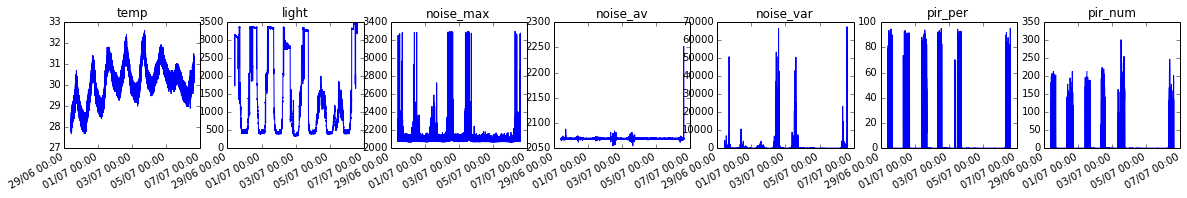

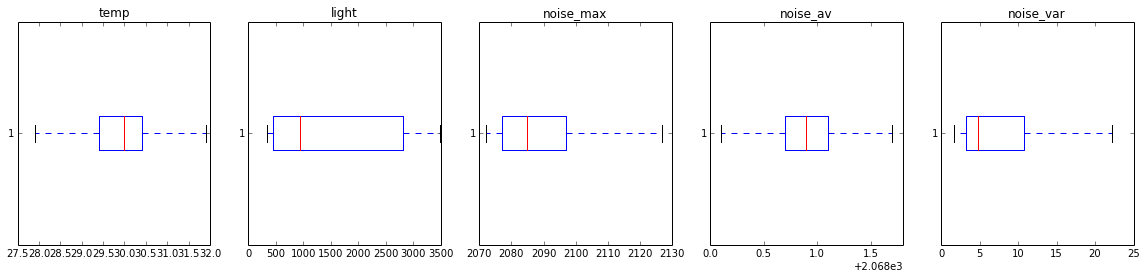

In [5]:
#PLOT
hfmt = mdates.DateFormatter('%d/%m %H:%M')

fig, axs = plt.subplots(1,len(params), sharex=True, figsize=(20,2.5))

for i in range(len(params)):
    para = params[i]
    axs[i].plot(df[para][start:end].index,df[para][start:end].values)
    axs[i].set_title(para)
    axs[i].xaxis.set_major_formatter(hfmt)
    axs[i].xaxis.set_major_locator(LinearLocator(numticks=5))
    #print "The mean %s was: %.1f(%.1f)." % (para,df[para][start:end].describe()["mean"],df[para][start:end].describe()["std"])

fig.autofmt_xdate()

fig, axs = plt.subplots(1,len(params)-2, sharex=False, figsize=(20,4))

for i in range(len(params)-2):
    para = params[i]
    axs[i].boxplot(df[para][start:end].values,0,'',0)
    axs[i].set_title(para)

**Simple Gauss filter of the data, first noise:**

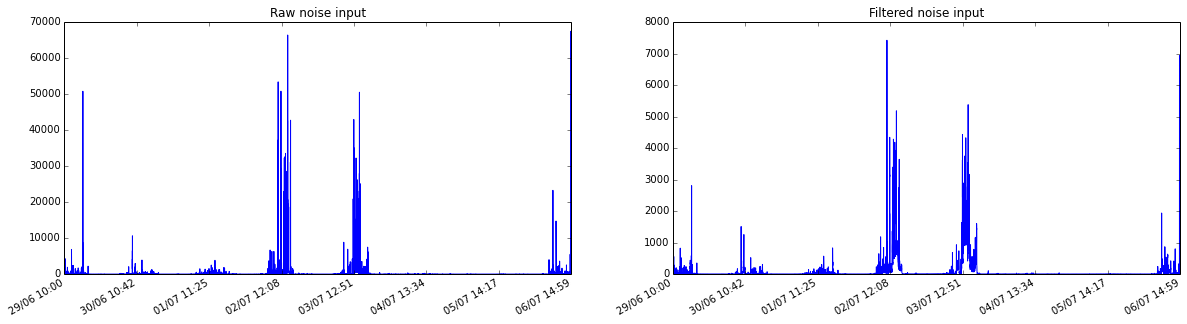

In [6]:
from scipy.signal import gaussian
from scipy.ndimage import filters

def Gauss_filt(y):
    b = gaussian(20, 15)
    ga = filters.convolve1d(y, b/b.sum())
    return ga

#NOISE
para = "noise_var"
ga_noise = Gauss_filt(df[para][start:end].values)

fig, axs = plt.subplots(1, 2, sharex=True, figsize=(20,5))
hfmt = mdates.DateFormatter('%d/%m %H:%M')

axs[0].plot(df[para][start:end].index,df[para][start:end].values)
axs[1].plot(df[para][start:end].index,ga_noise)

axs[0].set_title("Raw noise input")
axs[1].set_title("Filtered noise input")

for i in range(2):
    axs[i].xaxis.set_major_formatter(hfmt)
    axs[i].xaxis.set_major_locator(LinearLocator(numticks=8))

fig.autofmt_xdate()

**Filter the light signal:**

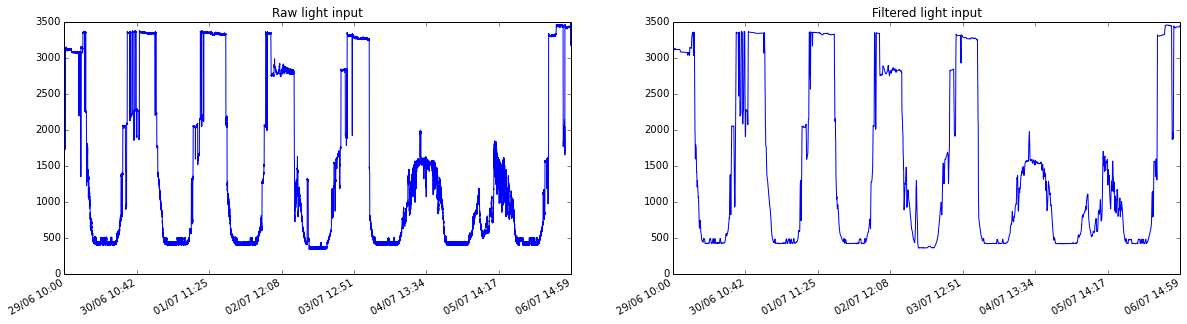

In [7]:
from scipy.signal import butter, gaussian, filtfilt
from scipy.ndimage import filters

def Gauss(y):
    b = gaussian(100, 60)
    ga = filters.convolve1d(y, b/b.sum())
    return ga

para = "light"

ga_light = Gauss(df[para][start:end].values)

fig, axs = plt.subplots(1, 2, sharex=True, figsize=(20,5))
hfmt = mdates.DateFormatter('%d/%m %H:%M')

axs[0].plot(df[start:end].index,df[para][start:end].values)
axs[1].plot(df[start:end].index,ga_light)

axs[0].set_title("Raw light input")
axs[1].set_title("Filtered light input")

for i in range(2):
    axs[i].xaxis.set_major_formatter(hfmt)
    axs[i].xaxis.set_major_locator(LinearLocator(numticks=8))

fig.autofmt_xdate()

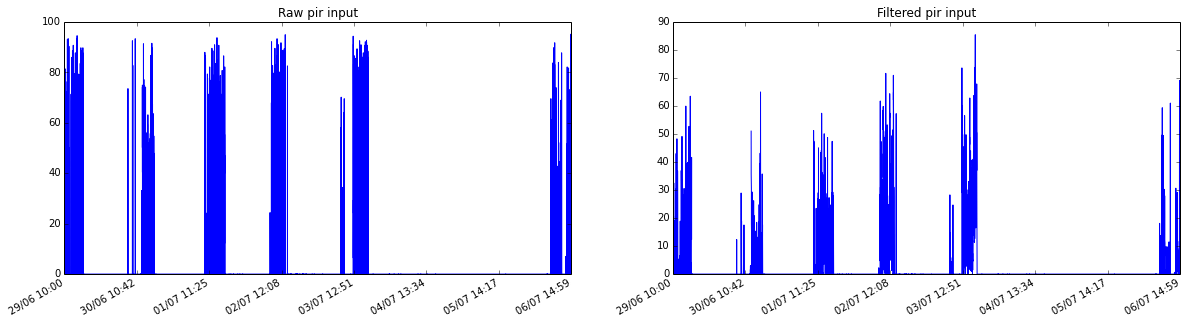

In [8]:
from scipy.signal import butter, gaussian, filtfilt
from scipy.ndimage import filters


def Gauss(y):
    b = gaussian(15, 5)
    ga = filters.convolve1d(y, b/b.sum())
    return ga

para = "pir_per"

ga_pir= Gauss(df[para][start:end].values)

fig, axs = plt.subplots(1, 2, sharex=True, figsize=(20,5))
hfmt = mdates.DateFormatter('%d/%m %H:%M')

axs[0].plot(df[start:end].index,df[para][start:end].values)
axs[1].plot(df[start:end].index,ga_pir)

axs[0].set_title("Raw pir input")
axs[1].set_title("Filtered pir input")

for i in range(2):
    axs[i].xaxis.set_major_formatter(hfmt)
    axs[i].xaxis.set_major_locator(LinearLocator(numticks=8))

fig.autofmt_xdate()

**Normalise light and noise signal:**

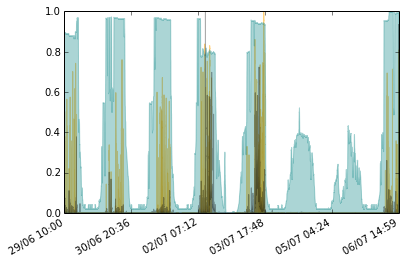

In [9]:
light_norm = (ga_light-np.nanmin(ga_light))/(np.nanmax(ga_light)-np.nanmin(ga_light))
noise_norm = (ga_noise-np.nanmin(ga_noise))/(np.nanmax(ga_noise)-np.nanmin(ga_noise))
pir_norm = (ga_pir-np.nanmin(ga_pir))/(np.nanmax(ga_pir)-np.nanmin(ga_pir))

fig, ax = plt.subplots()

#ax.plot(df[start:end].index,df["pir_per"][start:end].values/100,color='lightblue',alpha=.5)
#ax.plot(df[start:end].index,light_norm,color='teal',linewidth=1.5)
#ax.plot(df[start:end].index,noise_norm,color='black',linewidth=1.5)

ax.fill_between(df[start:end].index,pir_norm,color='orange',alpha=.5)
ax.fill_between(df[start:end].index,0,light_norm,color="teal", alpha=0.33)
ax.fill_between(df[start:end].index,0,noise_norm,color="black", alpha=0.33)


hfmt = mdates.DateFormatter('%d/%m %H:%M')

fig.autofmt_xdate()
ax.xaxis.set_major_locator(LinearLocator(numticks=6))
ax.xaxis.set_major_formatter(hfmt)

**Turn noise and light signal into a simple wavefunction with values 0,1 using a treshold value:**

(0, 1)

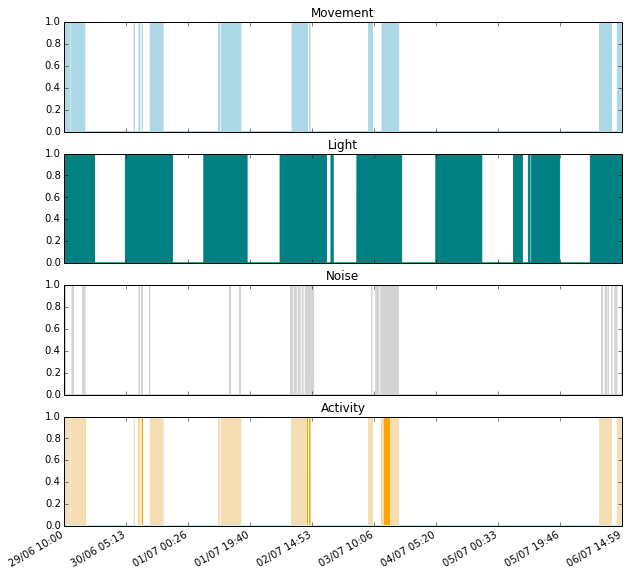

In [10]:
line_light = [1 if x>0.1 else 0 for x in light_norm]
line_noise = [1 if x>0.05 else 0 for x in noise_norm]
line_movement = [1 if x>0.05 else 0 for x in pir_norm]

day_active_high = [1 if (x==1 and y==1 and z==1) else 0 for (x,y,z) in zip(line_light,line_noise,line_movement)]
day_active_low = [1 if (x==1 and y==0 and z==1) else 0 for (x,y,z) in zip(line_light,line_noise,line_movement)]
night_active_high = [1 if (x==0 and y==1 and z==1) else 0 for (x,y,z) in zip(line_light,line_noise,line_movement)]
night_active_low = [1 if (x==0 and y==0 and z==1) else 0 for (x,y,z) in zip(line_light,line_noise,line_movement)]

fig, axs = plt.subplots(4, 1, sharex=True, sharey=True, figsize=(10,10))

axs[0].fill_between(df[start:end].index,0,line_movement,color="lightblue")
axs[1].fill_between(df[start:end].index,0,line_light,color="teal")
axs[2].fill_between(df[start:end].index,0,line_noise,color="lightgray")

axs[3].fill_between(df[start:end].index,0,day_active_high,color="orange")
axs[3].fill_between(df[start:end].index,0,day_active_low,color="wheat")
axs[3].fill_between(df[start:end].index,0,night_active_high,color="darkcyan")
axs[3].fill_between(df[start:end].index,0,night_active_low,color="lightcyan")

axs[0].set_title("Movement")
axs[1].set_title("Light")
axs[2].set_title("Noise")
axs[3].set_title("Activity")

hfmt = mdates.DateFormatter('%d/%m %H:%M')

fig.autofmt_xdate()
axs[0].xaxis.set_major_locator(LinearLocator(numticks=10))
axs[0].xaxis.set_major_formatter(hfmt)
axs[0].set_ylim((0,1))

In [12]:
out = pd.DataFrame(np.array([df[start:end].index,line_light,line_noise,line_movement]).T,columns=['timestamp','light','noise','movement'])
out.to_json(path_or_buf='test.json',date_format='iso',orient='records')


In [32]:
with open('test.json', 'w') as file_:
    file_.write(out.to_json)

TypeError: expected a character buffer object